Price
 - Tipo de dato
 - Cantidad de nulos
 - Cantidad de Vacios
 - Cantidad de datos unicos
 - Cantidad de datos totales

In [3]:
import pandas as pd

# Cargar únicamente la columna 'price' del archivo CSV
file_path = "../0_Dataset/Listings.csv"

data = pd.read_csv(file_path, usecols=['price','city'], delimiter=',', encoding='latin-1')

# Verificar si la columna 'price' existe en el DataFrame
if 'price' in data.columns:
    # Tipo de dato
    tipo_dato = data['price'].dtype
    
    # Cantidad de nulos
    cantidad_nulos = data['price'].isna().sum()
    
    # Cantidad de vacíos (considerando cadenas vacías)
    # Se ajusta para que solo cuente cadenas vacías si el tipo de dato es 'object'
    cantidad_vacios = (data['price'] == '').sum() if tipo_dato == 'object' else 0
    
    # Cantidad de datos únicos
    cantidad_unicos = data['price'].nunique()
    
    # Cantidad de datos totales
    cantidad_totales = data['price'].shape[0]
    
    # Imprimir resultados
    print(f"Columna 'price':")
    print(f" - Tipo de dato: {tipo_dato}")
    print(f" - Cantidad de nulos: {cantidad_nulos}")
    print(f" - Cantidad de vacíos: {cantidad_vacios}")
    print(f" - Cantidad de datos únicos: {cantidad_unicos}")
    print(f" - Cantidad de datos totales: {cantidad_totales}")
else:
    print("La columna 'price' no existe en el DataFrame.")

print(data['price'].value_counts())
print(data['price'].unique())

Columna 'price':
 - Tipo de dato: int64
 - Cantidad de nulos: 0
 - Cantidad de vacíos: 0
 - Cantidad de datos únicos: 5194
 - Cantidad de datos totales: 279712
price
100      6882
50       6438
70       6207
60       6172
80       6148
         ... 
4941        1
2055        1
2751        1
2553        1
36473       1
Name: count, Length: 5194, dtype: int64
[   53   120    89 ... 10010  5339 36473]


Analisis Cuantitaivo:
* Promedio
* Min
* Max
* Desviacion Estandar
* Q1
* Q2
* Q3
* Q4
* Mediana
* Kurtosis
* Skewness

ANALISIS CUANTITATIVOS POR CIUDADES

In [4]:
data.groupby('city')['price'].describe()


,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
Bangkok,19361.0,2078.278033,6379.788026,0.0,700.0,1100.0,1900.0,300177.0
Cape Town,19086.0,2405.120350,6143.197974,122.0,650.0,1069.0,2200.0,180000.0
Hong Kong,7087.0,746.169889,1938.236847,1.0,248.0,386.0,700.0,83665.0
Istanbul,24519.0,532.557445,3318.420594,0.0,150.0,252.0,449.0,179532.0
Mexico City,20065.0,1149.253028,5372.014858,0.0,391.0,661.0,1124.0,499000.0
New York,37012.0,142.842240,275.740987,0.0,60.0,99.0,151.0,10000.0
Paris,64690.0,113.096445,214.433668,0.0,59.0,80.0,120.0,12000.0
Rio de Janeiro,26615.0,742.589254,5368.868834,0.0,157.0,280.0,550.0,625216.0
Rome,27647.0,105.107643,341.154897,0.0,45.0,65.0,99.0,10571.0


ANALISIS CUANTITATIVO DEL PRECIO DE PARIS

In [6]:
# Filtrar los datos para quedarte solo con registros de la ciudad 'Paris'
datos_paris = data[data['city'].str.lower() == 'paris']

# Cantidad de filas antes de aplicar el filtro de valores válidos
total_antes = datos_paris['price'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores 0 o negativos
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después del filtro
total_despues = valores_validos.shape[0]

# Calcular cuántos valores fueron eliminados
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (nulos o ≤ 0): {valores_dropeados}")

# Análisis estadístico si hay datos válidos
if not valores_validos.empty:
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'price' en la ciudad de Paris:")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de valores eliminados (nulos o ≤ 0): 62

Análisis Cuantitativo de 'price' en la ciudad de Paris:
 - Promedio: 113.20 
 - Mínimo: 8 
 - Máximo: 12000
 - Desviación estándar: 214.51
 - Q1 (25%): 59.0
 - Q2 / Mediana (50%): 80.0
 - Q3 (75%): 120.0
 - Q4 (100%): 12000.0
 - Varianza: 46013.63
 - Curtosis (Kurtosis): 1176.9774
 - Asimetría (Skewness): 29.0839


El análisis descriptivo del precio por noche en alojamientos de Airbnb ubicados en París muestra una distribución altamente sesgada, con valores extremos que distorsionan significativamente las estadísticas generales. Se identificaron 62 registros con valores nulos o menores o iguales a cero, los cuales fueron eliminados del análisis por no representar precios válidos. Tras esta limpieza inicial, se observa que el precio promedio es de 113,20 USD, mientras que la mediana se encuentra en 80 USD, lo que indica una clara asimetría positiva en la distribución. Este desfase entre media y mediana revela que hay varios precios anormalmente altos que están arrastrando el promedio hacia arriba.

El valor máximo, de 12.000 USD, representa un caso extremo que, si bien podría corresponder a un alojamiento de lujo, también podría deberse a errores de entrada o condiciones especiales. Esta sospecha se refuerza con los valores de curtosis (1176,98) y asimetría (29,08), que son excepcionalmente elevados. Estos indicadores estadísticos evidencian una distribución con colas muy pesadas y una fuerte concentración de precios bajos junto a unos pocos valores desproporcionadamente altos. Aunque el 50% central de los datos (entre el primer y el tercer cuartil) se encuentra dentro del rango de 59 a 120 USD, lo cual parece razonable para el contexto de París, los valores extremos impiden que el promedio represente fielmente el comportamiento típico del mercado.

ANALISIS CUANTITATIVO APLICANDO OUTLIERS Y VALORES MAYOR A 0 DE FRANCIA

In [8]:
# 1. Filtrar datos solo para la ciudad de París
datos_paris = data[data['city'].str.lower() == 'paris']

# 2. Filtrar valores válidos: eliminar nulos y precios ≤ 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 3. Calcular IQR y límites para detectar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 4. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 5. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 6. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 7. Mostrar resultados
    print(f"Cantidad de outliers detectados en París: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'price' en París (sin outliers):")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo} ")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados en París: 5164

Análisis Cuantitativo de 'price' en París (sin outliers):
 - Promedio: 85.01 
 - Mínimo: 8 
 - Máximo: 211 
 - Desviación estándar: 39.97
 - Q1 (25%): 55.0
 - Q2 / Mediana (50%): 77.0
 - Q3 (75%): 101.0
 - Varianza: 1597.5370
 - Curtosis (Kurtosis): 0.5830
 - Asimetría (Skewness): 0.9784


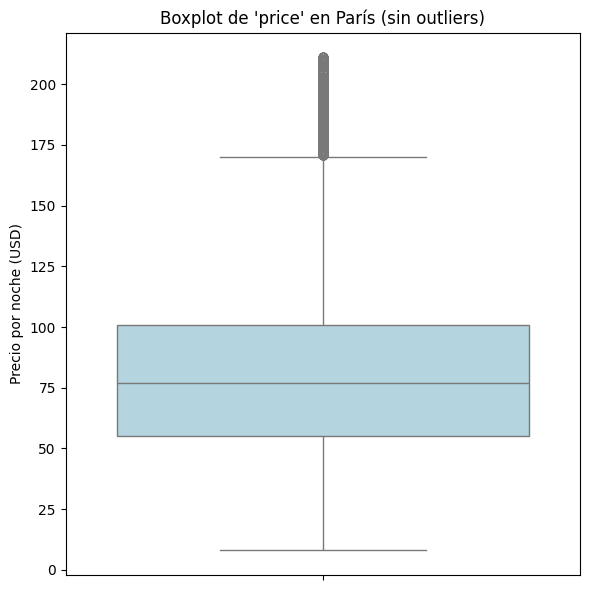

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos de la ciudad de París
datos_paris = data[data['city'].str.lower() == 'paris']

# Filtrar valores válidos de price: sin nulos ni valores <= 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Calcular IQR y eliminar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'price' en París (sin outliers)")
plt.ylabel("Precio por noche (USD)")
plt.tight_layout()
plt.show()


ANALISIS CUANTITATIVO DEL PRECIO DE NEW YORK

In [14]:
# Filtrar los datos para quedarte solo con registros de la ciudad 'Paris'
datos_paris = data[data['city'].str.lower() == 'new york']

# Cantidad de filas antes de aplicar el filtro de valores válidos
total_antes = datos_paris['price'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores 0 o negativos
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después del filtro
total_despues = valores_validos.shape[0]

# Calcular cuántos valores fueron eliminados
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (nulos o ≤ 0): {valores_dropeados}")

# Análisis estadístico si hay datos válidos
if not valores_validos.empty:
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'price' en la ciudad de new york:")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de valores eliminados (nulos o ≤ 0): 28

Análisis Cuantitativo de 'price' en la ciudad de new york:
 - Promedio: 142.95 
 - Mínimo: 10 
 - Máximo: 10000
 - Desviación estándar: 275.82
 - Q1 (25%): 60.0
 - Q2 / Mediana (50%): 99.0
 - Q3 (75%): 151.0
 - Q4 (100%): 10000.0
 - Varianza: 76075.20
 - Curtosis (Kurtosis): 651.5091
 - Asimetría (Skewness): 21.2889


ANALISIS CUANTITATIVO APLICANDO OUTLIERS Y VALORES MAYOR A 0 DE NEW YORK

In [15]:
# 1. Filtrar datos solo para la ciudad de París
datos_paris = data[data['city'].str.lower() == 'new york']

# 2. Filtrar valores válidos: eliminar nulos y precios ≤ 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 3. Calcular IQR y límites para detectar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 4. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 5. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 6. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 7. Mostrar resultados
    print(f"Cantidad de outliers detectados en New york: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'price' en New york (sin outliers):")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo} ")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados en New york: 2727

Análisis Cuantitativo de 'price' en New york (sin outliers):
 - Promedio: 104.96 
 - Mínimo: 10 
 - Máximo: 287 
 - Desviación estándar: 58.80
 - Q1 (25%): 60.0
 - Q2 / Mediana (50%): 90.0
 - Q3 (75%): 140.0
 - Varianza: 3457.5946
 - Curtosis (Kurtosis): 0.1686
 - Asimetría (Skewness): 0.9072


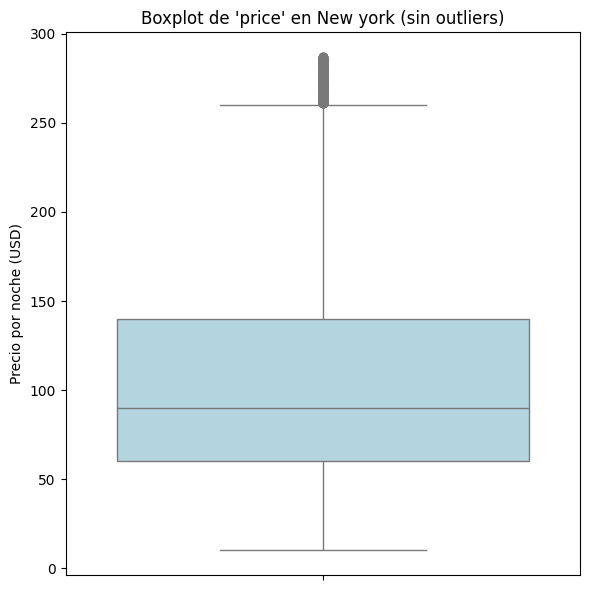

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos de la ciudad de París
datos_paris = data[data['city'].str.lower() == 'new york']

# Filtrar valores válidos de price: sin nulos ni valores <= 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Calcular IQR y eliminar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'price' en New york (sin outliers)")
plt.ylabel("Precio por noche (USD)")
plt.tight_layout()
plt.show()


ANALISIS CUANTITATIVO DEL PRECIO DE SIDNEY

In [18]:
# Filtrar los datos para quedarte solo con registros de la ciudad 'Paris'
datos_paris = data[data['city'].str.lower() == 'sydney']

# Cantidad de filas antes de aplicar el filtro de valores válidos
total_antes = datos_paris['price'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores 0 o negativos
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después del filtro
total_despues = valores_validos.shape[0]

# Calcular cuántos valores fueron eliminados
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (nulos o ≤ 0): {valores_dropeados}")

# Análisis estadístico si hay datos válidos
if not valores_validos.empty:
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'price' en la ciudad de Sidney:")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de valores eliminados (nulos o ≤ 0): 0

Análisis Cuantitativo de 'price' en la ciudad de Sidney:
 - Promedio: 222.01 
 - Mínimo: 5 
 - Máximo: 28613
 - Desviación estándar: 472.64
 - Q1 (25%): 74.0
 - Q2 / Mediana (50%): 120.0
 - Q3 (75%): 219.0
 - Q4 (100%): 28613.0
 - Varianza: 223384.97
 - Curtosis (Kurtosis): 800.3189
 - Asimetría (Skewness): 20.7446


ANALISIS CUANTITATIVO APLICANDO OUTLIERS Y VALORES MAYOR A 0 DE SYDNEY


In [19]:
# 1. Filtrar datos solo para la ciudad de París
datos_paris = data[data['city'].str.lower() == 'sydney']

# 2. Filtrar valores válidos: eliminar nulos y precios ≤ 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 3. Calcular IQR y límites para detectar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 4. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 5. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 6. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 7. Mostrar resultados
    print(f"Cantidad de outliers detectados en Sydney: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'price' en Sydney: (sin outliers):")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo} ")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados en Sydney: 3328

Análisis Cuantitativo de 'price' en Sydney: (sin outliers):
 - Promedio: 136.43 
 - Mínimo: 5 
 - Máximo: 436 
 - Desviación estándar: 89.28
 - Q1 (25%): 70.0
 - Q2 / Mediana (50%): 110.0
 - Q3 (75%): 180.0
 - Varianza: 7970.4985
 - Curtosis (Kurtosis): 0.8814
 - Asimetría (Skewness): 1.1917


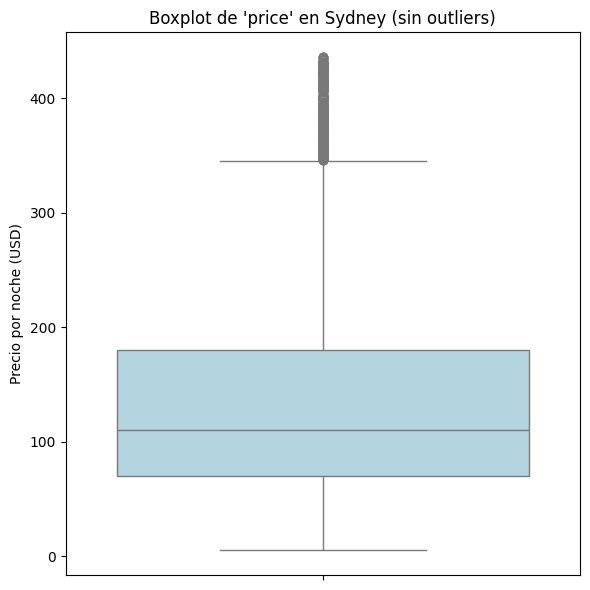

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos de la ciudad de París
datos_paris = data[data['city'].str.lower() == 'sydney']

# Filtrar valores válidos de price: sin nulos ni valores <= 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Calcular IQR y eliminar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'price' en Sydney (sin outliers)")
plt.ylabel("Precio por noche (USD)")
plt.tight_layout()
plt.show()


ANALISIS CUANTITATIVO DEL PRECIO DE ROME

In [22]:
# Filtrar los datos para quedarte solo con registros de la ciudad 'Paris'
datos_paris = data[data['city'].str.lower() == 'rome']

# Cantidad de filas antes de aplicar el filtro de valores válidos
total_antes = datos_paris['price'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores 0 o negativos
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después del filtro
total_despues = valores_validos.shape[0]

# Calcular cuántos valores fueron eliminados
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (nulos o ≤ 0): {valores_dropeados}")

# Análisis estadístico si hay datos válidos
if not valores_validos.empty:
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'price' en la ciudad de Roma:")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de valores eliminados (nulos o ≤ 0): 6

Análisis Cuantitativo de 'price' en la ciudad de Roma:
 - Promedio: 105.13 
 - Mínimo: 7 
 - Máximo: 10571
 - Desviación estándar: 341.19
 - Q1 (25%): 45.0
 - Q2 / Mediana (50%): 65.0
 - Q3 (75%): 99.0
 - Q4 (100%): 10571.0
 - Varianza: 116409.53
 - Curtosis (Kurtosis): 583.2300
 - Asimetría (Skewness): 22.6018


ANALISIS CUANTITATIVO APLICANDO OUTLIERS Y VALORES MAYOR A 0 DE ROME

In [23]:
# 1. Filtrar datos solo para la ciudad de París
datos_paris = data[data['city'].str.lower() == 'rome']

# 2. Filtrar valores válidos: eliminar nulos y precios ≤ 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 3. Calcular IQR y límites para detectar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 4. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 5. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 6. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 7. Mostrar resultados
    print(f"Cantidad de outliers detectados en ROME: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'price' en ROME (sin outliers):")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo} ")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados en ROME: 2232

Análisis Cuantitativo de 'price' en ROME (sin outliers):
 - Promedio: 69.06 
 - Mínimo: 7 
 - Máximo: 180 
 - Desviación estándar: 34.57
 - Q1 (25%): 45.0
 - Q2 / Mediana (50%): 61.0
 - Q3 (75%): 89.0
 - Varianza: 1195.1152
 - Curtosis (Kurtosis): 0.5635
 - Asimetría (Skewness): 0.9377


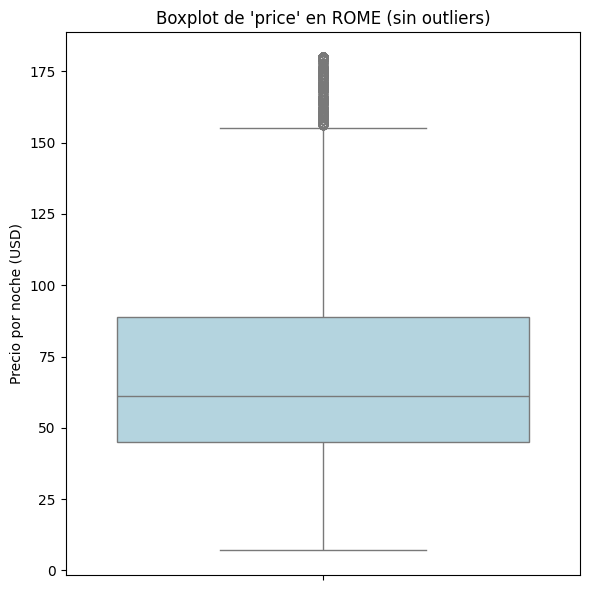

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos de la ciudad de París
datos_paris = data[data['city'].str.lower() == 'rome']

# Filtrar valores válidos de price: sin nulos ni valores <= 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Calcular IQR y eliminar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'price' en ROME (sin outliers)")
plt.ylabel("Precio por noche (USD)")
plt.tight_layout()
plt.show()


ANALISIS CUANTITATIVO DEL PRECIO DE RIO DE JANEIRO

In [26]:
# Filtrar los datos para quedarte solo con registros de la ciudad 'Paris'
datos_paris = data[data['city'].str.lower() == 'rio de janeiro']

# Cantidad de filas antes de aplicar el filtro de valores válidos
total_antes = datos_paris['price'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores 0 o negativos
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después del filtro
total_despues = valores_validos.shape[0]

# Calcular cuántos valores fueron eliminados
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (nulos o ≤ 0): {valores_dropeados}")

# Análisis estadístico si hay datos válidos
if not valores_validos.empty:
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'price' en la ciudad de Rio de janeiro:")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de valores eliminados (nulos o ≤ 0): 7

Análisis Cuantitativo de 'price' en la ciudad de Rio de janeiro:
 - Promedio: 742.78 
 - Mínimo: 33 
 - Máximo: 625216
 - Desviación estándar: 5369.56
 - Q1 (25%): 157.0
 - Q2 / Mediana (50%): 280.0
 - Q3 (75%): 550.0
 - Q4 (100%): 625216.0
 - Varianza: 28832190.91
 - Curtosis (Kurtosis): 7075.3690
 - Asimetría (Skewness): 68.2950


ANALISIS CUANTITATIVO APLICANDO OUTLIERS Y VALORES MAYOR A 0 DE RIO DE JANEIRO

In [27]:
# 1. Filtrar datos solo para la ciudad de París
datos_paris = data[data['city'].str.lower() == 'rio de janeiro']

# 2. Filtrar valores válidos: eliminar nulos y precios ≤ 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 3. Calcular IQR y límites para detectar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 4. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 5. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 6. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 7. Mostrar resultados
    print(f"Cantidad de outliers detectados en Rio de janeiro: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'price' en Rio de janeiro (sin outliers):")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo} ")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados en Rio de janeiro: 2770

Análisis Cuantitativo de 'price' en Rio de janeiro (sin outliers):
 - Promedio: 329.06 
 - Mínimo: 33 
 - Máximo: 1139 
 - Desviación estándar: 245.48
 - Q1 (25%): 150.0
 - Q2 / Mediana (50%): 250.0
 - Q3 (75%): 443.0
 - Varianza: 60258.8614
 - Curtosis (Kurtosis): 1.0350
 - Asimetría (Skewness): 1.2997


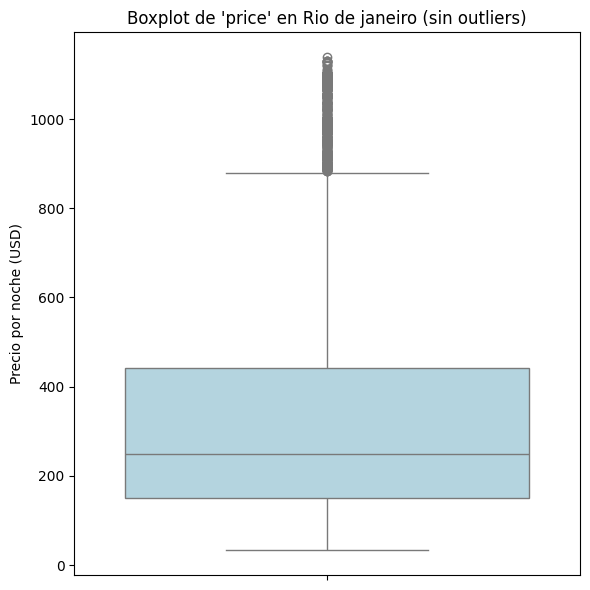

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos de la ciudad de París
datos_paris = data[data['city'].str.lower() == 'rio de janeiro']

# Filtrar valores válidos de price: sin nulos ni valores <= 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Calcular IQR y eliminar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'price' en Rio de janeiro (sin outliers)")
plt.ylabel("Precio por noche (USD)")
plt.tight_layout()
plt.show()


ANALISIS CUANTITATIVO DEL PRECIO DE ISTANBUL

In [29]:
# Filtrar los datos para quedarte solo con registros de la ciudad 'Paris'
datos_paris = data[data['city'].str.lower() == 'istanbul']

# Cantidad de filas antes de aplicar el filtro de valores válidos
total_antes = datos_paris['price'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores 0 o negativos
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después del filtro
total_despues = valores_validos.shape[0]

# Calcular cuántos valores fueron eliminados
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (nulos o ≤ 0): {valores_dropeados}")

# Análisis estadístico si hay datos válidos
if not valores_validos.empty:
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'price' en la ciudad de Istanbul:")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de valores eliminados (nulos o ≤ 0): 2

Análisis Cuantitativo de 'price' en la ciudad de Istanbul:
 - Promedio: 532.60 
 - Mínimo: 31 
 - Máximo: 179532
 - Desviación estándar: 3318.55
 - Q1 (25%): 150.0
 - Q2 / Mediana (50%): 252.0
 - Q3 (75%): 449.0
 - Q4 (100%): 179532.0
 - Varianza: 11012790.45
 - Curtosis (Kurtosis): 1746.2288
 - Asimetría (Skewness): 38.0009


ANALISIS CUANTITATIVO APLICANDO OUTLIERS Y VALORES MAYOR A 0 DE ISTANBUL


In [30]:
# 1. Filtrar datos solo para la ciudad de París
datos_paris = data[data['city'].str.lower() == 'istanbul']

# 2. Filtrar valores válidos: eliminar nulos y precios ≤ 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 3. Calcular IQR y límites para detectar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 4. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 5. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 6. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 7. Mostrar resultados
    print(f"Cantidad de outliers detectados en Istanbul: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'price' en Istanbul (sin outliers):")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo} ")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados en Istanbul: 1917

Análisis Cuantitativo de 'price' en Istanbul (sin outliers):
 - Promedio: 288.89 
 - Mínimo: 31 
 - Máximo: 896 
 - Desviación estándar: 192.30
 - Q1 (25%): 144.0
 - Q2 / Mediana (50%): 233.0
 - Q3 (75%): 385.0
 - Varianza: 36977.9154
 - Curtosis (Kurtosis): 0.6872
 - Asimetría (Skewness): 1.1336


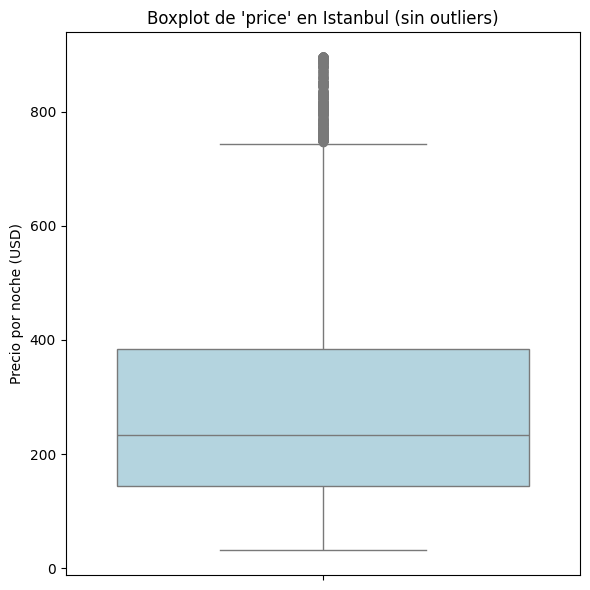

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos de la ciudad de París
datos_paris = data[data['city'].str.lower() == 'istanbul']

# Filtrar valores válidos de price: sin nulos ni valores <= 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Calcular IQR y eliminar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'price' en Istanbul (sin outliers)")
plt.ylabel("Precio por noche (USD)")
plt.tight_layout()
plt.show()


ANALISIS CUANTITATIVO DEL PRECIO DE MEXICO

In [33]:
# Filtrar los datos para quedarte solo con registros de la ciudad 'Paris'
datos_paris = data[data['city'].str.lower() == 'mexico city']

# Cantidad de filas antes de aplicar el filtro de valores válidos
total_antes = datos_paris['price'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores 0 o negativos
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después del filtro
total_despues = valores_validos.shape[0]

# Calcular cuántos valores fueron eliminados
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (nulos o ≤ 0): {valores_dropeados}")

# Análisis estadístico si hay datos válidos
if not valores_validos.empty:
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'price' en la ciudad de MEXICO:")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de valores eliminados (nulos o ≤ 0): 7

Análisis Cuantitativo de 'price' en la ciudad de MEXICO:
 - Promedio: 1149.65 
 - Mínimo: 100 
 - Máximo: 499000
 - Desviación estándar: 5372.91
 - Q1 (25%): 392.0
 - Q2 / Mediana (50%): 664.0
 - Q3 (75%): 1124.0
 - Q4 (100%): 499000.0
 - Varianza: 28868154.30
 - Curtosis (Kurtosis): 4784.7041
 - Asimetría (Skewness): 60.7228


ANALISIS CUANTITATIVO APLICANDO OUTLIERS Y VALORES MAYOR A 0 DE MEXICO CITY


In [34]:
# 1. Filtrar datos solo para la ciudad de París
datos_paris = data[data['city'].str.lower() == 'mexico city']

# 2. Filtrar valores válidos: eliminar nulos y precios ≤ 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 3. Calcular IQR y límites para detectar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 4. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 5. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 6. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 7. Mostrar resultados
    print(f"Cantidad de outliers detectados en MEXICO CITY: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'price' en MEXICO CITY (sin outliers):")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo} ")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados en MEXICO CITY: 1497

Análisis Cuantitativo de 'price' en MEXICO CITY (sin outliers):
 - Promedio: 738.72 
 - Mínimo: 100 
 - Máximo: 2220 
 - Desviación estándar: 461.04
 - Q1 (25%): 370.0
 - Q2 / Mediana (50%): 601.0
 - Q3 (75%): 999.0
 - Varianza: 212561.5464
 - Curtosis (Kurtosis): 0.4765
 - Asimetría (Skewness): 1.0532


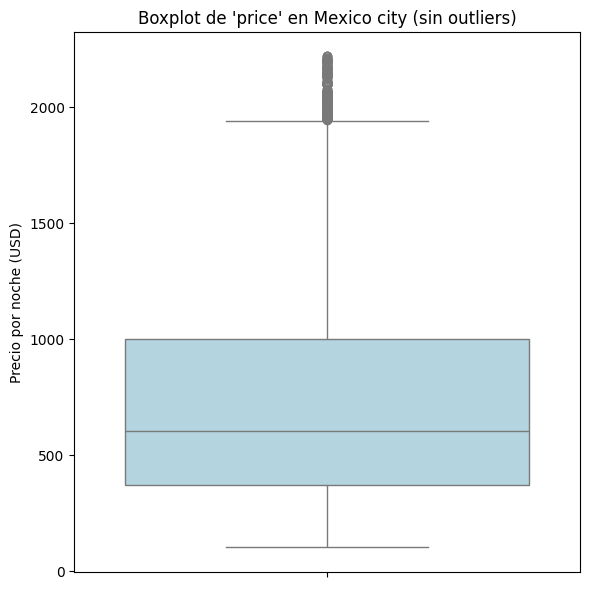

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos de la ciudad de París
datos_paris = data[data['city'].str.lower() == 'mexico city']

# Filtrar valores válidos de price: sin nulos ni valores <= 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Calcular IQR y eliminar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'price' en Mexico city (sin outliers)")
plt.ylabel("Precio por noche (USD)")
plt.tight_layout()
plt.show()


ANALISIS CUANTITATIVO DEL PRECIO DE BANGKOK


In [36]:
# Filtrar los datos para quedarte solo con registros de la ciudad 'Paris'
datos_paris = data[data['city'].str.lower() == 'bangkok']

# Cantidad de filas antes de aplicar el filtro de valores válidos
total_antes = datos_paris['price'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores 0 o negativos
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después del filtro
total_despues = valores_validos.shape[0]

# Calcular cuántos valores fueron eliminados
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (nulos o ≤ 0): {valores_dropeados}")

# Análisis estadístico si hay datos válidos
if not valores_validos.empty:
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'price' en la ciudad de Bangkok:")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de valores eliminados (nulos o ≤ 0): 1

Análisis Cuantitativo de 'price' en la ciudad de Bangkok:
 - Promedio: 2078.39 
 - Mínimo: 241 
 - Máximo: 300177
 - Desviación estándar: 6379.94
 - Q1 (25%): 700.0
 - Q2 / Mediana (50%): 1100.0
 - Q3 (75%): 1900.0
 - Q4 (100%): 300177.0
 - Varianza: 40703574.60
 - Curtosis (Kurtosis): 931.9640
 - Asimetría (Skewness): 24.8536


ANALISIS CUANTITATIVO APLICANDO OUTLIERS Y VALORES MAYOR A 0 DE Bangkok


In [37]:
# 1. Filtrar datos solo para la ciudad de París
datos_paris = data[data['city'].str.lower() == 'bangkok']

# 2. Filtrar valores válidos: eliminar nulos y precios ≤ 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 3. Calcular IQR y límites para detectar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 4. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 5. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 6. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 7. Mostrar resultados
    print(f"Cantidad de outliers detectados en Bangkok: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'price' en Bangkok (sin outliers):")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo} ")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados en Bangkok: 1680

Análisis Cuantitativo de 'price' en Bangkok (sin outliers):
 - Promedio: 1236.01 
 - Mínimo: 241 
 - Máximo: 3700 
 - Desviación estándar: 754.28
 - Q1 (25%): 688.0
 - Q2 / Mediana (50%): 1000.0
 - Q3 (75%): 1590.0
 - Varianza: 568934.1357
 - Curtosis (Kurtosis): 0.8363
 - Asimetría (Skewness): 1.1826


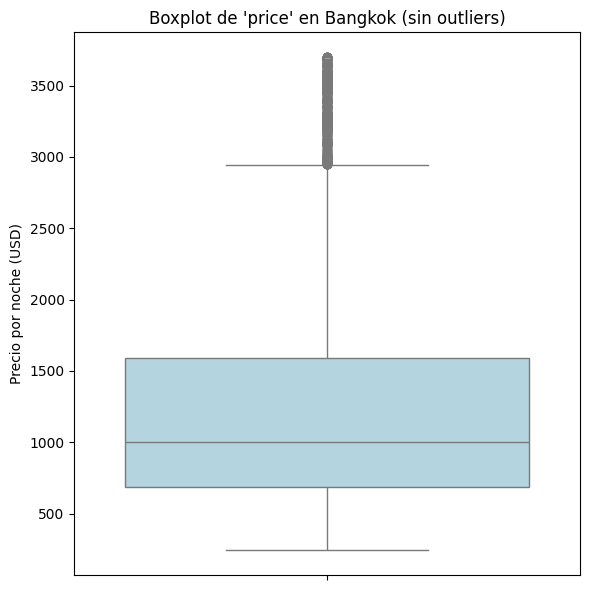

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos de la ciudad de París
datos_paris = data[data['city'].str.lower() == 'bangkok']

# Filtrar valores válidos de price: sin nulos ni valores <= 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Calcular IQR y eliminar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'price' en Bangkok (sin outliers)")
plt.ylabel("Precio por noche (USD)")
plt.tight_layout()
plt.show()


ANALISIS CUANTITATIVO DEL PRECIO DE CAPE TOWN

In [39]:
# Filtrar los datos para quedarte solo con registros de la ciudad 'Paris'
datos_paris = data[data['city'].str.lower() == 'cape town']

# Cantidad de filas antes de aplicar el filtro de valores válidos
total_antes = datos_paris['price'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores 0 o negativos
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después del filtro
total_despues = valores_validos.shape[0]

# Calcular cuántos valores fueron eliminados
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (nulos o ≤ 0): {valores_dropeados}")

# Análisis estadístico si hay datos válidos
if not valores_validos.empty:
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'price' en la ciudad de CAPE TOWN:")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de valores eliminados (nulos o ≤ 0): 0

Análisis Cuantitativo de 'price' en la ciudad de CAPE TOWN:
 - Promedio: 2405.12 
 - Mínimo: 122 
 - Máximo: 180000
 - Desviación estándar: 6143.20
 - Q1 (25%): 650.0
 - Q2 / Mediana (50%): 1069.0
 - Q3 (75%): 2200.0
 - Q4 (100%): 180000.0
 - Varianza: 37738881.35
 - Curtosis (Kurtosis): 296.4192
 - Asimetría (Skewness): 14.3849


ANALISIS CUANTITATIVO APLICANDO OUTLIERS Y VALORES MAYOR A 0 DE CAPE TOWN


In [40]:
# 1. Filtrar datos solo para la ciudad de París
datos_paris = data[data['city'].str.lower() == 'cape town']

# 2. Filtrar valores válidos: eliminar nulos y precios ≤ 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 3. Calcular IQR y límites para detectar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 4. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 5. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 6. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 7. Mostrar resultados
    print(f"Cantidad de outliers detectados en Cape town: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'price' en Cape town (sin outliers):")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo} ")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados en Cape town: 1971

Análisis Cuantitativo de 'price' en Cape town (sin outliers):
 - Promedio: 1292.24 
 - Mínimo: 122 
 - Máximo: 4509 
 - Desviación estándar: 956.11
 - Q1 (25%): 600.0
 - Q2 / Mediana (50%): 978.0
 - Q3 (75%): 1679.0
 - Varianza: 914152.7610
 - Curtosis (Kurtosis): 1.4227
 - Asimetría (Skewness): 1.3990


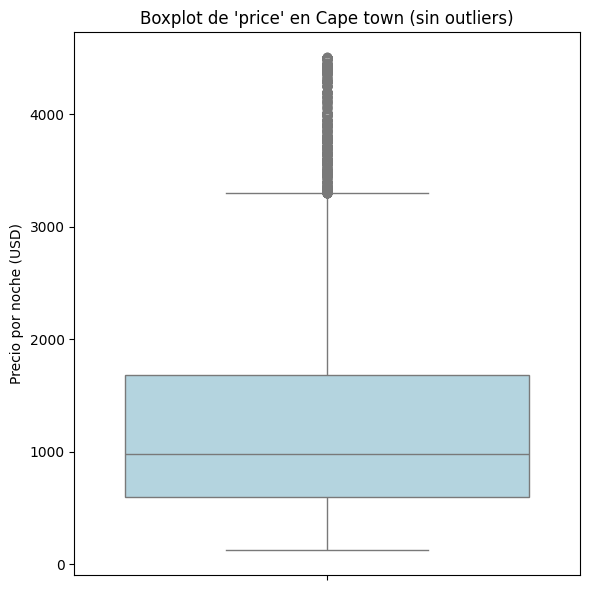

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos de la ciudad de París
datos_paris = data[data['city'].str.lower() == 'cape town']

# Filtrar valores válidos de price: sin nulos ni valores <= 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Calcular IQR y eliminar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'price' en Cape town (sin outliers)")
plt.ylabel("Precio por noche (USD)")
plt.tight_layout()
plt.show()


ANALISIS CUANTITATIVO DEL PRECIO DE HONG KONG

In [42]:
# Filtrar los datos para quedarte solo con registros de la ciudad 'Paris'
datos_paris = data[data['city'].str.lower() == 'hong kong']

# Cantidad de filas antes de aplicar el filtro de valores válidos
total_antes = datos_paris['price'].shape[0]

# Filtrar valores válidos: eliminar nulos y valores 0 o negativos
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Cantidad de filas después del filtro
total_despues = valores_validos.shape[0]

# Calcular cuántos valores fueron eliminados
valores_dropeados = total_antes - total_despues

# Imprimir el resultado
print(f"Cantidad de valores eliminados (nulos o ≤ 0): {valores_dropeados}")

# Análisis estadístico si hay datos válidos
if not valores_validos.empty:
    promedio = valores_validos.mean()
    minimo = valores_validos.min()
    maximo = valores_validos.max()
    desviacion = valores_validos.std()
    q1 = valores_validos.quantile(0.25)
    q2 = valores_validos.quantile(0.50)  # Mediana
    q3 = valores_validos.quantile(0.75)
    q4 = valores_validos.quantile(1.0)
    varianza = valores_validos.var()
    kurtosis = valores_validos.kurtosis()
    skewness = valores_validos.skew()

    # Mostrar resultados
    print("\nAnálisis Cuantitativo de 'price' en la ciudad de HONG KONG:")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo}")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Q4 (100%): {q4}")
    print(f" - Varianza: {varianza:.2f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de valores eliminados (nulos o ≤ 0): 0

Análisis Cuantitativo de 'price' en la ciudad de HONG KONG:
 - Promedio: 746.17 
 - Mínimo: 1 
 - Máximo: 83665
 - Desviación estándar: 1938.24
 - Q1 (25%): 248.0
 - Q2 / Mediana (50%): 386.0
 - Q3 (75%): 700.0
 - Q4 (100%): 83665.0
 - Varianza: 3756762.07
 - Curtosis (Kurtosis): 704.5419
 - Asimetría (Skewness): 20.7314


In [43]:
# 1. Filtrar datos solo para la ciudad de París
datos_paris = data[data['city'].str.lower() == 'hong kong']

# 2. Filtrar valores válidos: eliminar nulos y precios ≤ 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# 3. Calcular IQR y límites para detectar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# 4. Identificar outliers
outliers = valores_validos[(valores_validos < limite_inferior) | (valores_validos > limite_superior)]
cantidad_outliers = outliers.shape[0]

# 5. Eliminar outliers
valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# 6. Calcular estadísticas descriptivas sin outliers
if not valores_sin_outliers.empty:
    promedio = valores_sin_outliers.mean()
    minimo = valores_sin_outliers.min()
    maximo = valores_sin_outliers.max()
    desviacion = valores_sin_outliers.std()
    q1 = valores_sin_outliers.quantile(0.25)
    q2 = valores_sin_outliers.quantile(0.50)
    q3 = valores_sin_outliers.quantile(0.75)
    varianza = valores_sin_outliers.var()
    kurtosis = valores_sin_outliers.kurtosis()
    skewness = valores_sin_outliers.skew()

    # 7. Mostrar resultados
    print(f"Cantidad de outliers detectados en Hong kong: {cantidad_outliers}\n")
    print("Análisis Cuantitativo de 'price' en Hong kong (sin outliers):")
    print(f" - Promedio: {promedio:.2f} ")
    print(f" - Mínimo: {minimo} ")
    print(f" - Máximo: {maximo} ")
    print(f" - Desviación estándar: {desviacion:.2f}")
    print(f" - Q1 (25%): {q1}")
    print(f" - Q2 / Mediana (50%): {q2}")
    print(f" - Q3 (75%): {q3}")
    print(f" - Varianza: {varianza:.4f}")
    print(f" - Curtosis (Kurtosis): {kurtosis:.4f}")
    print(f" - Asimetría (Skewness): {skewness:.4f}")
else:
    print("No hay suficientes datos válidos para realizar el análisis.")


Cantidad de outliers detectados en Hong kong: 620

Análisis Cuantitativo de 'price' en Hong kong (sin outliers):
 - Promedio: 446.09 
 - Mínimo: 1 
 - Máximo: 1378 
 - Desviación estándar: 284.33
 - Q1 (25%): 235.0
 - Q2 / Mediana (50%): 350.0
 - Q3 (75%): 590.0
 - Varianza: 80841.9657
 - Curtosis (Kurtosis): 0.5168
 - Asimetría (Skewness): 1.1359


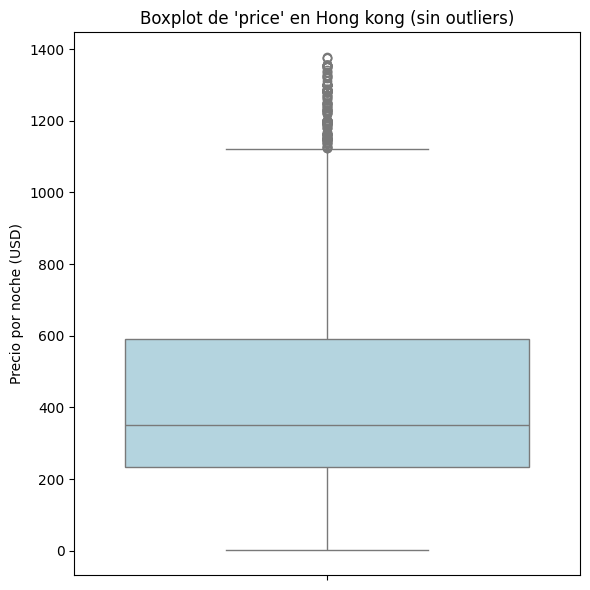

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos de la ciudad de París
datos_paris = data[data['city'].str.lower() == 'hong kong']

# Filtrar valores válidos de price: sin nulos ni valores <= 0
valores_validos = datos_paris['price'].dropna()
valores_validos = valores_validos[valores_validos > 0]

# Calcular IQR y eliminar outliers
q1 = valores_validos.quantile(0.25)
q3 = valores_validos.quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

valores_sin_outliers = valores_validos[(valores_validos >= limite_inferior) & (valores_validos <= limite_superior)]

# Crear el boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(y=valores_sin_outliers, color="lightblue")
plt.title("Boxplot de 'price' en Hong kong (sin outliers)")
plt.ylabel("Precio por noche (USD)")
plt.tight_layout()
plt.show()
